In [ ]:
NAME = "Wako Morimoto"

---

# Lab 6: Skip Gram

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- The type of question and the points they carry are indicated in each question cell
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- You can delete the `raise NotImplementedError()`
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to bcourses. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [ ]:
!pip install gensim
!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 


import pandas as pd
import numpy as np 
import gensim

File ‘GoogleNews-vectors-negative300.bin.gz’ already there; not retrieving.



In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
word_vectors = model.wv
word_vectors.vocab

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


{'</s>': <gensim.models.keyedvectors.Vocab at 0x7fa877d79b00>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fa877d795c0>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7fa877d79320>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7fa877d79be0>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7fa877d79eb8>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7fa877d79c18>,
 '##': <gensim.models.keyedvectors.Vocab at 0x7fa877d79630>,
 'The': <gensim.models.keyedvectors.Vocab at 0x7fa877d79390>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7fa877d79f98>,
 'said': <gensim.models.keyedvectors.Vocab at 0x7fa877d79550>,
 'was': <gensim.models.keyedvectors.Vocab at 0x7fa877d79fd0>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fa87858a7b8>,
 'at': <gensim.models.keyedvectors.Vocab at 0x7fa877d865c0>,
 'not': <gensim.models.keyedvectors.Vocab at 0x7fa877d86da0>,
 'as': <gensim.models.keyedvectors.Vocab at 0x7fa877d86048>,
 'it': <gensim.models.keyedvectors.Vocab at 0x7fa877d869b0>,
 'be': <gen

### **Q1 (1 point)** 
Find the cosine similarity between the following word pairs

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)

In [ ]:
#Replace 0 with the code / value; Do not delete this cell
similarity_pair1 = model.similarity('France', 'England')
similarity_pair2 = model.similarity('smaller', 'bigger')
similarity_pair3 = model.similarity('England', 'London')
similarity_pair4 = model.similarity('France', 'Rocket')
similarity_pair5 = model.similarity('big', 'bigger')



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
#This is an autograded cell, do not edit/delete
print(similarity_pair1, similarity_pair2, similarity_pair3, similarity_pair4, similarity_pair5)

0.39804944 0.7302272 0.43992856 0.07114174 0.68423855


### **Q2 (1 point)** 
Write an expression to extract the vector representations of the words: 

- France
- England
- smaller
- bigger
- rocket
- big

Get only the first 5 elements for each vector representation.

In [ ]:
#Replace 0 with the code / value to get the first 5 elements of each vector; Do not delete this cell
vector_1 = model.word_vec('France')[:5]
vector_2 = model.word_vec('England')[:5]
vector_3 = model.word_vec('smaller')[:5]
vector_4 = model.word_vec('bigger')[:5]
vector_5 = model.word_vec('rocket')[:5]
vector_6 = model.word_vec('big')[:5]



In [ ]:
#This is an autograded cell, do not edit/delete
print(vector_1)
print(vector_2)
print(vector_3)
print(vector_4)
print(vector_5)
print(vector_6)


[0.04858398 0.07861328 0.32421875 0.03491211 0.07714844]
[-0.19824219  0.11523438  0.0625     -0.05834961  0.2265625 ]
[-0.05004883  0.03417969 -0.0703125   0.17578125  0.00689697]
[-0.06542969 -0.09521484 -0.06225586  0.16210938  0.01989746]
[-0.03198242  0.27148438 -0.2890625  -0.15429688  0.16894531]
[ 0.11132812  0.10595703 -0.07373047  0.18847656  0.07666016]


### **Q3 (1 point)** 
Find the euclidean distances between the word pairs : 

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)


In [ ]:
#Replace 0 with the code / value; Do not delete this cell
eu_dist1 = model.distance('France', 'England')
eu_dist2 = model.distance('smaller', 'bigger')
eu_dist3 = model.distance('England', 'London')
eu_dist4 = model.distance('France', 'Rocket')
eu_dist5 = model.distance('big', 'bigger')



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
#This is an autograded cell, do not edit / delete
print(eu_dist1)
print(eu_dist2)
print(eu_dist3)
print(eu_dist4)
print(eu_dist5)


0.6019505560398102
0.26977282762527466
0.5600714385509491
0.928858257830143
0.3157614469528198


### **Q4 (1 point)**
Time to dabble with the power of Word2Vec. Find the 2 closest words  for the following conditions:  
- (King - Man + Queen)
- (bigger - big + small)
- (waiting - wait + run)
- (Texas + Milwaukee – Wisconsin)

In [ ]:
#Replace 0 with the code / value; Do not delete this cell
closest1 = model.most_similar(positive=['King', 'Queen'], negative=['Man'])[:2]
closest2 = model.most_similar(positive=['bigger', 'small'], negative=['big'])[:2]
closest3 = model.most_similar(positive=['man', 'programmer'], negative=['woman'])[:2]
closest4 = model.most_similar(positive=['waiting', 'run'], negative=['wait'])[:2]
closest5 = model.most_similar(positive=['Texas', 'Milwaukee'], negative=['Wisconsin'])[:2]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
#This is an autograded cell, do not edit/delete
print(closest1)
print(closest2)
print(closest3)
print(closest4)
print(closest5)


[('Queen_Elizabeth', 0.5257916450500488), ('monarch', 0.5004087090492249)]
[('larger', 0.7402471899986267), ('smaller', 0.732999324798584)]
[('programer', 0.5371963977813721), ('programmers', 0.5310999155044556)]
[('running', 0.5654535889625549), ('runs', 0.49640005826950073)]
[('Houston', 0.7767744064331055), ('Fort_Worth', 0.7270511388778687)]


### **Q5 (3 points)**
Using the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering and explain your findings.

*Note : Since there are ~3Mil words in the vocabulary, you can downsample it to ~20-30k randomly selected words*

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
#randomly select words
import random
words = []
for x in range(1, 20000):
  choice = random.choice(list(word_vectors.vocab))
  words.append(choice)

In [ ]:
#make a matrix
vectors = []
for i in words:
    vectors.append(model.word_vec(i))

In [ ]:
vectors

[array([ 2.37304688e-01, -7.95898438e-02,  2.69531250e-01,  2.83203125e-01,
        -8.05664062e-02, -4.93164062e-02,  7.37304688e-02,  3.85742188e-02,
        -5.32226562e-02,  1.61132812e-01,  8.39843750e-02, -2.07031250e-01,
        -1.50146484e-02,  2.24609375e-01, -2.12890625e-01, -1.57226562e-01,
        -5.93261719e-02, -3.61328125e-02, -2.34375000e-01, -3.59375000e-01,
         2.25585938e-01,  5.98144531e-02,  3.88671875e-01, -7.03125000e-02,
        -1.43554688e-01, -1.21093750e-01, -2.15820312e-01,  2.36816406e-02,
         2.41210938e-01, -3.90625000e-01, -2.13867188e-01, -1.12304688e-01,
         1.42578125e-01,  3.49121094e-02,  7.37304688e-02, -2.42919922e-02,
         8.05664062e-02, -3.69140625e-01,  4.53948975e-04,  2.87109375e-01,
         4.14062500e-01, -2.53906250e-01,  1.21582031e-01, -4.76074219e-02,
        -9.66796875e-02, -4.95605469e-02, -3.41796875e-02,  2.05078125e-01,
         1.59179688e-01, -1.56250000e-02, -7.22656250e-02,  3.20312500e-01,
         1.6

In [ ]:
#kmeans clustering and elbow method to figure out the best k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = np.array(vectors)

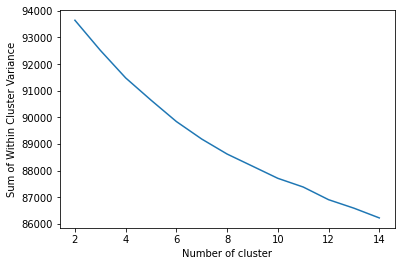

In [ ]:
scv = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    y_means = kmeans.predict(X)
    scv[k] = kmeans.inertia_
plt.figure()
plt.plot(list(scv.keys()), list(scv.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of Within Cluster Variance")
plt.show()
#raise NotImplementedError()

In [ ]:
def q1(df):
  max_silhouette = 0
  for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    if score > max_silhouette:
      max_silhouette = score
      best_k = k
  return best_k

In [ ]:
from sklearn.metrics import silhouette_score
print("the best k value for this dataset is: ", q1(X))

the best k value for this dataset is:  2


In [ ]:
#try with the best k value
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(X)
predictions = kmeans.predict(X)

In [ ]:
#combine words and clusters to see semantic relationship"
table = pd.DataFrame({ 'words' : words,
                       'cluster' : predictions
                    })
table.head()

words  cluster
0              cumshot        0
1  Barbara_Schneeweiss        0
2         Vikram_Ispat        0
3         Loney_Kember        1
4            CoreGuard        1

In [ ]:
table.groupby('cluster').count()

words
cluster       
0        15564
1         4435

As the elbow graph displays above, there is no one clearly visible "dip" that represents itself as the best k value. This could indicate that through euclidean distancing, the words in the Google News is pretty well-rounded, collecting words from different ends of spectrum. In the end, 2 is calculated as the best k value, and about 1/4th of the randomly selected words belong to one cluster over the another. 

### **Q6 (1 point)**
What loss function does the skipgram model use and briefly describe what this function is minimizing.

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
"""The skipgram model uses softmax function to minimize categorical cross-entropy loss, which is the probability of a word missclassified as a context word for the target"""

'The skipgram model uses softmax function to minimize categorical cross-entropy loss, which is the probability of a word missclassified as a context word for the target'

### **Bonus Question (1 point)** 
Find at least 2 interesting word vec combinations like the ones given in Q4

**Do not delete the below cell**

In [ ]:
# YOUR CODE HERE
interesting = [['window', 'building'], ['summer','New York'],['vampire','tomatoes']]
for x in interesting:
  print (x[0], 'and', x[1])

window and building
summer and New York
vampire and tomatoes


### Part 2


In [ ]:
import os
import string
import re
import pprint
from urllib.request import urlopen
import gensim
from gensim import corpora, models, similarities

import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
## Nazi Conspiracy and Aggression, Vol 3
url = "https://dev.gutenberg.org/files/63350/63350-0.txt" ## Your raw text file location 
resp = urlopen(url)
raw = resp.read().decode('utf8')
firstlook = tokenize.sent_tokenize(raw)

In [ ]:
firstlook[:10]

['\ufeffThe Project Gutenberg eBook, Nazi Conspiracy and Aggression, Volume III\r\n(of 11), by Various\r\n\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and most\r\nother parts of the world at no cost and with almost no restrictions \r\nwhatsoever.',
 'You may copy it, give it away or re-use it under the terms of\r\nthe Project Gutenberg License included with this eBook or online at \r\nwww.gutenberg.org.',
 "If you are not located in the United States, you'll have\r\nto check the laws of the country where you are located before using this ebook.",
 'Title: Nazi Conspiracy and Aggression, Volume III (of 11)\r\n\r\n\r\nAuthor: Various\r\n\r\n\r\n\r\nRelease Date: September 30, 2020  [eBook #63350]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n\r\n***START OF THE PROJECT GUTENBERG EBOOK NAZI CONSPIRACY AND AGGRESSION,\r\nVOLUME III (OF 11)***\r\n\r\n\r\nE-text prepared by Graeme Mackreth and the Online Distributed Proofreading\r\nTeam (ht

In [ ]:
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
tokenized_raw = " ".join(nltk.regexp_tokenize(raw, pattern))
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

In [ ]:
tokenized_raw[:10]

['The Project Gutenberg eBook , Nazi Conspiracy and Aggression , Volume III ( of 11 ) , by Various This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever .',
 'You may copy it , give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www .',
 'gutenberg .',
 'org .',
 "If you are not located in the United States , you'll have to check the laws of the country where you are located before using this ebook .",
 'Title : Nazi Conspiracy and Aggression , Volume III ( of 11 ) Author : Various Release Date : September 30 , 2020 [ eBook 63350 ] Language : English Character set encoding : UTF-8 * * * START OF THE PROJECT GUTENBERG EBOOK NAZI CONSPIRACY AND AGGRESSION , VOLUME III ( OF 11 ) * * * E-text prepared by Graeme Mackreth and the Online Distributed Proofreading Team ( http : / / www .',
 'pgdp .',
 'net ) from page images generously 

In [ ]:
## clean words, remove punctuation
nopunct = []
for sent in tokenized_raw:
    a = [w for w in sent.split() if w not in string.punctuation]
    nopunct.append(" ".join(a))

In [ ]:
# Word tokenize
tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]
tok_corp[:3]

[['The',
  'Project',
  'Gutenberg',
  'eBook',
  'Nazi',
  'Conspiracy',
  'and',
  'Aggression',
  'Volume',
  'III',
  'of',
  '11',
  'by',
  'Various',
  'This',
  'eBook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'in',
  'the',
  'United',
  'States',
  'and',
  'most',
  'other',
  'parts',
  'of',
  'the',
  'world',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever'],
 ['You',
  'may',
  'copy',
  'it',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'Project',
  'Gutenberg',
  'License',
  'included',
  'with',
  'this',
  'eBook',
  'or',
  'online',
  'at',
  'www'],
 ['gutenberg']]

In [ ]:
### Create a list of unique words 
my_unique_words = list(set([item for sublist in tok_corp for item in sublist]))
len(my_unique_words)

22013

1. Generate embeddings from the corpus you have chosen.

In [ ]:
nltk.download('punkt')
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
my_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
--2020-11-05 04:05:37--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.153.206
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.153.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.5MB/s    in 98s     

2020-11-05 04:07:15 (16.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
my_model = gensim.models.Word2Vec(tok_corp, min_count=1, size=16, window=5)

In [ ]:
my_vector_list = my_model[my_unique_words]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
my_vector_list

array([[ 0.01486046,  0.02448296, -0.0023528 , ..., -0.00350991,
        -0.01402943, -0.02787113],
       [ 0.02549588, -0.02852295, -0.02864669, ...,  0.02224968,
         0.00081789, -0.03117736],
       [-0.01271095, -0.02642964, -0.01302658, ...,  0.01144657,
         0.00096991, -0.07732011],
       ...,
       [-0.00441719, -0.02798189, -0.01002439, ..., -0.05092072,
        -0.15841578, -0.23585123],
       [ 0.0350699 , -0.09073781, -0.0998121 , ...,  0.00600676,
        -0.34634203, -0.55169755],
       [-0.03080401, -0.00806408, -0.01197371, ...,  0.03593689,
        -0.02087326, -0.04667998]], dtype=float32)

In [ ]:
import numpy as np
np.array(my_vector_list).shape

(22013, 16)

In [ ]:
for i in range(5):
    print(my_unique_words[i], my_vector_list[i])

walling [ 0.01486046  0.02448296 -0.0023528  -0.00249334 -0.00311818 -0.02485792
 -0.04065005  0.00928099 -0.02903944  0.04972326  0.00453795 -0.00083254
  0.03616184 -0.00350991 -0.01402943 -0.02787113]
entrepreneur [ 0.02549588 -0.02852295 -0.02864669 -0.02922247  0.01248922  0.01319017
 -0.01413914  0.03043125  0.01157801  0.06141665  0.0261952  -0.05370786
 -0.01867697  0.02224968  0.00081789 -0.03117736]
sentry [-0.01271095 -0.02642964 -0.01302658 -0.01847635  0.01149089 -0.02125316
 -0.00586994 -0.01598552  0.03801462  0.05071905 -0.02370269 -0.1291962
 -0.01679453  0.01144657  0.00096991 -0.07732011]
half [ 0.01930855 -0.22375518 -0.11090469 -0.4110285   0.09654663 -0.02752427
 -0.20006016  0.05665769 -0.07550891  0.6529921   0.1037489  -1.0502158
 -0.04599008  0.09544154 -0.48413953 -0.72087383]
incumbent [ 0.01239299 -0.03295882 -0.01558223  0.00859544  0.00361619  0.00731876
 -0.02678164  0.00532391 -0.03533974  0.04486449  0.0123759  -0.03341549
 -0.03005764  0.0073191  -0.0

2. Based on your knowledge and understand of the text corpus you have chosen, form 3 hypotheses of analogies or relationships you expect will hold and give a reason why. Experimentally validate these hypotheses. (e.g., if using Moby Dick as the corpus, one hypothesis might be that the whale, "Mobie Dick" is (cosine) more similar to "good" than to "evil" and is more similar to "opposition" than to "mystery")

Hypothesis 1: If the text is on Nazi conspiracy, the word "Nazi" is more cosine similar to "Germany" than to "France".

In [ ]:
Nazi_Germany = model.similarity('Nazi', 'Germany')
Nazi_France = model.similarity('Nazi', 'France')

print("cosine similarity of 'Nazi' to 'Germany': ", Nazi_Germany, "cosine similarity of 'Nazi' to 'France': ", Nazi_France)
print("whaaat")

cosine similarity of 'Nazi' to 'Germany':  0.78505224 cosine similarity of 'Nazi' to 'France':  0.9137628
whaaat


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


Hypothesis 2: If the text is on Nazi conspiracy, the word "the United States" is more cosine similar to "Allies" than to "Axis"

In [ ]:
mili_terri = model.similarity('military', 'territory')
mili_mys = model.similarity('military', 'mystery')

print("cosine similarity of 'military' to 'territory': ", mili_terri, "cosine similarity of 'military' to 'mystery': ", mili_mys)

cosine similarity of 'military' to 'territory':  0.9656479 cosine similarity of 'military' to 'mystery':  0.1683652


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


Hypothesis 3: If the text is on Nazi conspiracy, the word "Japan" is more cosine similar to "foreign" than to "island"

In [ ]:
jpn_foreign = model.similarity('Japan', 'foreign')
jpn_islands = model.similarity('Japan', 'islands')

print("cosine similarity of 'Japan' to 'foreign': ", jpn_foreign, "cosine similarity of 'Japan' to 'islands': ", jpn_islands)

cosine similarity of 'Japan' to 'foreign':  0.93351054 cosine similarity of 'Japan' to 'islands':  0.7220047


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


3. Use T-SNE or PCA to reduce the dimensionality of the vectors to two dimensions for:
- The GoogleNews corpus pre-trained vectors from Lab 6. Feel free to down sample this set of vectors to 10 - 20k words based on frequency.
- The embeddings you just generated.

Reduce dimensionality on GoogleNews

In [ ]:
from sklearn.manifold import TSNE
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vectors)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19999 samples in 0.935s...
[t-SNE] Computed neighbors for 19999 samples in 328.776s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19999
[t-SNE] Computed conditional probabilities for sample 2000 / 19999
[t-SNE] Computed conditional probabilities for sample 3000 / 19999
[t-SNE] Computed conditional probabilities for sample 4000 / 19999
[t-SNE] Computed conditional probabilities for sample 5000 / 19999
[t-SNE] Computed conditional probabilities for sample 6000 / 19999
[t-SNE] Computed conditional probabilities for sample 7000 / 19999
[t-SNE] Computed conditional probabilities for sample 8000 / 19999
[t-SNE] Computed conditional probabilities for sample 9000 / 19999
[t-SNE] Computed conditional probabilities for sample 10000 / 19999
[t-SNE] Computed conditional probabilities for sample 11000 / 19999
[t-SNE] Computed conditional probabilities for sample 12000 / 19999
[t-SNE] Computed conditional probabilities for 

Reduce dimensionality on the embedded data on Nazi conspiracy text

In [ ]:
from sklearn.manifold import TSNE
my_data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(my_vector_list)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 22013 samples in 0.057s...
[t-SNE] Computed neighbors for 22013 samples in 11.103s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22013
[t-SNE] Computed conditional probabilities for sample 2000 / 22013
[t-SNE] Computed conditional probabilities for sample 3000 / 22013
[t-SNE] Computed conditional probabilities for sample 4000 / 22013
[t-SNE] Computed conditional probabilities for sample 5000 / 22013
[t-SNE] Computed conditional probabilities for sample 6000 / 22013
[t-SNE] Computed conditional probabilities for sample 7000 / 22013
[t-SNE] Computed conditional probabilities for sample 8000 / 22013
[t-SNE] Computed conditional probabilities for sample 9000 / 22013
[t-SNE] Computed conditional probabilities for sample 10000 / 22013
[t-SNE] Computed conditional probabilities for sample 11000 / 22013
[t-SNE] Computed conditional probabilities for sample 12000 / 22013
[t-SNE] Computed conditional probabilities for s

4. Using this (Links to an external site.) library (or your choice of scatterplot library), visualize both reduced datasets from the step above and explore the visualization.

Visualize the GoogleNews

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

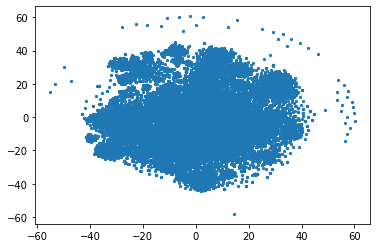

In [ ]:
x_axis= data_embed[:,0]
y_axis=data_embed[:,1]

plt.scatter(x_axis, y_axis, s=5)
plt.show() ## The plots vary each time you run them 

comment: Roughly speaking, the data points are concentrated into one big blob in the center with some visible sub-groups at the border of the blob. On the upper half of the graph, however, there are sprinkles of data points that surround the blob--these data points could be counted as a cluster of its own, but since the labels are not applied here yet, it is too early to conclude so. 

Visualize my text

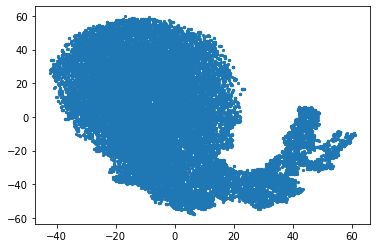

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
x_axis= my_data_embed[:,0]
y_axis = my_data_embed[:,1]

plt.scatter(x_axis, y_axis, s=5)
plt.show() ## The plots vary each time you run them 

comment: The dataset has a very rough U shape with the bloated left side of the letter. The "left-side of the U letter" generally lies between -40 and 20 in x-axis and -60 to 60 in y-axis. The "right-side of the U letter" is much smaller in size, and there are some variance as it shifts to larger x-axis value. Unlike the visualization above, there is no visible sprinkles that have large distance from other data points.

6. convert array to tsv

In [ ]:
#convert GoogleNews
import pandas as pd
GoogleNews = pd.DataFrame(data=data_embed, columns=["x", "y"])
GoogleNews[['Feature 1']] = list(word_vectors)

ValueError: ignored

In [ ]:
len(vectors)

19999

In [ ]:
GoogleNews.shape

(22013, 3)

issue in the cells above: though the embedded data has a total of 22013 pairs, but the input "vectors" only has 19999 values. The words chosen somehow became smaller than the length of the dataframe, thus I was not able to insert Feature 1 in the lab.

In [ ]:
GoogleNews.head()

x          y
0 -36.641506   4.597209
1 -15.902803   8.507511
2  10.936142 -13.817444
3   7.873540  38.428101
4 -16.611841   5.926247

In [ ]:
Google_tsv = GoogleNews.to_csv('myGoogleNewstext.tsv', sep='\t', index=False)

In [ ]:
Google_tsv

In [ ]:
#convert Nazi conspiracy text
NaziConspiracy = pd.DataFrame(data=my_data_embed, columns=['x','y'])
NaziConspiracy[['Feature 1']] = my_unique_words
NaziConspiracy.head()

x          y     Feature 1
0  -3.457831  40.554390       walling
1   9.786973  22.517069  entrepreneur
2  -6.055114  -7.449972        sentry
3  40.719845 -18.332523          half
4   7.977970  22.602909     incumbent

In [ ]:
NC_tsv = NaziConspiracy.to_csv('myNC.tsv', sep='\t', index=False)
NC_tsv

In [ ]:
from google.colab.output import eval_js
from IPython.display import Javascript

In [ ]:
!git clone https://github.com/CAHLR/d3-scatterplot.git

Cloning into 'd3-scatterplot'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1022 (delta 9), reused 1 (delta 0), pack-reused 1003
Receiving objects: 100% (1022/1022), 1.94 MiB | 1.94 MiB/s, done.
Resolving deltas: 100% (590/590), done.


In [ ]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8000
data_file = 'myNC.tsv'
height = 1600

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

Another comment here: I double checked that the column names were titled correctly and followed the instructions as best as possible, but there is no interactive visualization here. I have kept the work above to show my process on the topic.